In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-messages/spam.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv('/kaggle/input/sms-messages/spam.csv',encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.head() 

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
def preprocess(x):
    if x=="spam":
        return 1
    return 0

In [6]:
df['spam']=df['v1'].apply(preprocess)

In [7]:
df.head()

,v1,v2,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
spam_count=df['spam'].value_counts()
spam_count

spam
0    4825
1     747
Name: count, dtype: int64

Text(0.5, 1.0, 'Spam ')

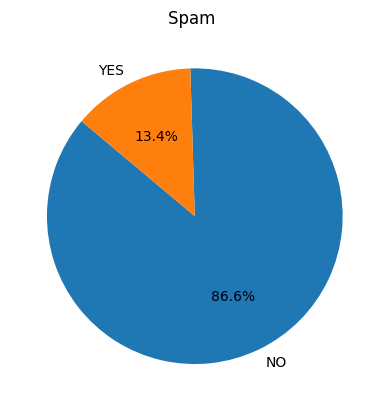

In [9]:
plt.subplot(1,1,1)
plt.pie(spam_count,labels=["NO","YES"], autopct='%1.1f%%', startangle=140)
plt.title("Spam ")

In [10]:
import nltk
nltk.download("stopwords")
from nltk.stem import PorterStemmer
import string
tokill=string.punctuation

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [11]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [12]:
ps=PorterStemmer()

In [13]:
def data_cleaning(x):
    wordlist=[]
    for word in x.split():
        word=word.lower()
        if word not in sw:
            letterlist=[]
            for letter in word:
                if letter not in tokill:
                    letterlist.append(letter)
            stemword=ps.stem("".join(letterlist))
            wordlist.append(stemword)
    x=" ".join(wordlist)
    return x        

In [14]:
df["v2"]=df["v2"].apply(data_cleaning)

In [15]:
df

,v1,v2,spam
0,ham,go jurong point crazi avail bugi n great world...,0
1,ham,ok lar joke wif u oni,0
2,spam,free entri 2 wkli comp win fa cup final tkt 21...,1
3,ham,u dun say earli hor u c alreadi say,0
4,ham,nah think goe usf live around though,0
...,...,...,...
5567,spam,2nd time tri 2 contact u u å£750 pound prize 2...,1
5568,ham,ì b go esplanad fr home,0
5569,ham,piti mood that soani suggest,0
5570,ham,guy bitch act like id interest buy someth els ...,0


In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df["v2"],df["spam"],test_size=0.3,random_state=42)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tf=TfidfVectorizer()
xtrainout=tf.fit_transform(xtrain).toarray()

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrainout,ytrain)


LogisticRegression()

In [20]:
lr.score(xtrainout,ytrain)

0.9638461538461538

In [21]:
xtestout=tf.transform(xtest)

In [22]:
lr.score(xtestout,ytest)

0.9521531100478469

In [23]:
from sklearn.metrics import accuracy_score,classification_report
pred=lr.predict(xtestout)
print(accuracy_score(ytest,pred))


0.9521531100478469


In [24]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.97      0.65      0.78       219

    accuracy                           0.95      1672
   macro avg       0.96      0.83      0.88      1672
weighted avg       0.95      0.95      0.95      1672



In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xtrainout,ytrain)
pred=rfc.predict(xtestout)
print(accuracy_score(ytest,pred))

0.9754784688995215


In [26]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1453
           1       1.00      0.81      0.90       219

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672

